### Aim
This notebook leverages a basic neural net to predict mnist images. It then uses the shap library to graphically interpret the weights.

### Imports

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Input
import matplotlib.pyplot as plt
import numpy as np
import shap

# to avoid a certificates issue run the following 2 lines:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

###  Data load and clean data

In [2]:
mnist = tf.keras.datasets.mnist #28*28 images 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

#print(x_train[0])
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

### Model
This is a simple architecture with minimal training:

2 fully connected hidden layers and a final layer to output the probabilities

In [3]:
input1 = Input(shape=(28, 28))
flatten = Flatten(input_shape=(28, 28))(input1)
lay1 = Dense(128, activation='relu')(flatten)#(input1)#input_shape=(10,2)
lay2 = Dense(128, activation='relu')(lay1)
out1 = Dense(10, activation='softmax')(lay2)
model = tf.keras.models.Model(inputs=[input1], outputs=[out1])

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)
model.summary()

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2627 - accuracy: 0.9237
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1070 - accuracy: 0.9667
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0720 - accuracy: 0.9774
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0534 - accuracy: 0.9829: 0s - l
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0391 - accuracy: 0.9873
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
___

In [4]:
val_loss, val_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 870us/step - loss: 0.1064 - accuracy: 0.9690


### Save the model

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: my_model.model/assets


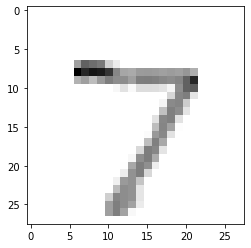

In [5]:
model.save('my_model.model')
new_model = tf.keras.models.load_model('my_model.model')
predictions = new_model.predict([x_test])

# print(predictions) #prints the arrays with prob distributions
# print(np.argmax(predictions[0])) # the most likely pred for sample 0
plt.imshow(x_test[0], cmap = plt.cm.binary)
plt.show()

### Explain model with shap's DeepExplainer

Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


keras is no longer supported, please use tf.keras instead.


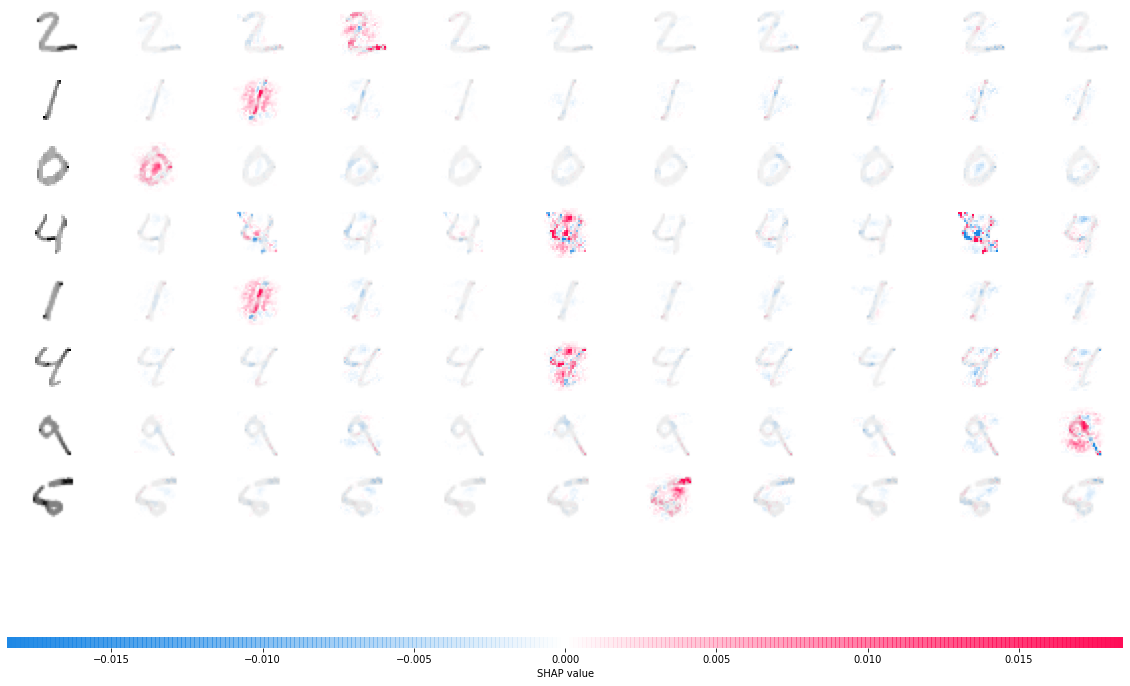

In [6]:
# select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]

# explain predictions of the model on eight images
e = shap.DeepExplainer(model, background)
shap_values = e.shap_values(x_test[1:9])

# plot the feature attributions
shap.image_plot(shap_values, -x_test[1:9])

In the plot above, we have one column per class; red indicate the pixels that made the model more confident that this is the class, and blue indicates pixels that made the model dismiss the class. 

For more examples of the shap library check out: https://github.com/slundberg/shap